In [1]:
# Preparació de les dades

from sklearn import datasets
import numpy as np

iris = datasets.load_iris()

X = iris.data[:,[2,3]]
y = iris.target

# 0: Iris Setosa
# 1: Iris Versicolour
# 2: Iris Virginica
print('Class labels:',np.unique(y))

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]
Class labels: [0 1 2]


In [2]:
# Separació en conjunts d'entrenament (70%) i test (30%)

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.3, random_state = 1, stratify = y)

In [3]:
# Normalització amb un escalat estàndard, mitjana a 0 i desviació típica a 1.

from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

In [4]:
# Funció que mostra els punts a les gràfiques

from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt

def plot_decision_regions (X,y,classifier, test_idx=None,resolution=0.02):
  markers =('s','^','o','x','v')
  colors=('red','blue','lightgreen','gray','cyan')
  cmap=ListedColormap(colors[:len(np.unique(y))])

  #plot_decision_boundary

  x1_min, x1_max = X[:,0].min()-1, X[:,0].max() + 1
  x2_min, x2_max = X[:,1].min()-1, X[:,1].max() + 1
  xx1,xx2=np.meshgrid(np.arange(x1_min,x1_max,resolution),
                      np.arange(x2_min,x2_max,resolution))
  Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)

  Z = Z.reshape(xx1.shape)
  plt.contourf(xx1,xx2, Z, alpha=0.3, cmap=cmap)
  plt.xlim(xx1.min(),xx1.max())
  plt.ylim(xx2.min(),xx2.max())

  # mostram totes les dades
  for idx, cl in enumerate(np.unique(y)):
    plt.scatter(x=X[y==cl,0],y=X[y==cl,1],
                alpha=0.8, c=colors[idx],
                marker=markers[idx], label=cl,
                edgecolor='black')

  # destacam les dades de test
  if test_idx:

    X_test, y_test = X[test_idx, : ], y[test_idx]
    plt.scatter(X_test[:,0], X_test[:,1],
                  #c='',
                  edgecolor='black', alpha=0.5,
                  linewidth=1, marker='o',
                  s=100, label = 'test set')

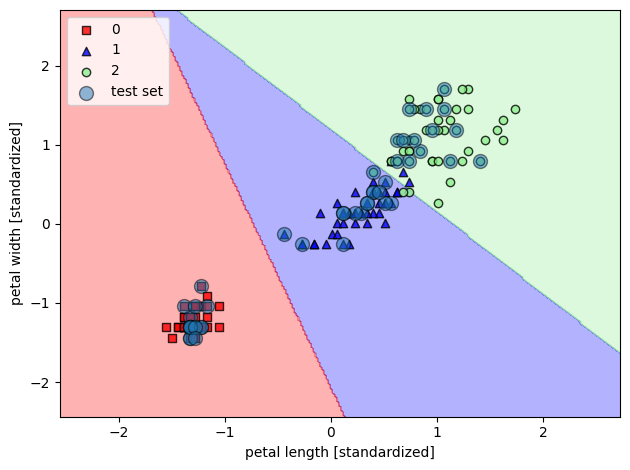

In [5]:
# Regressió logística

from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(C=100.0,
                        random_state = 1,
                        solver = 'lbfgs',
                        multi_class='ovr')
lr.fit(X_train_std, y_train)

X_combined_std = np.vstack((X_train_std, X_test_std))

y_combined = np.hstack((y_train,y_test))

plot_decision_regions(X_combined_std,
                      y_combined,
                      classifier=lr,
                      test_idx=range(105,150))

plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc = 'upper left')
plt.tight_layout()
plt.show()

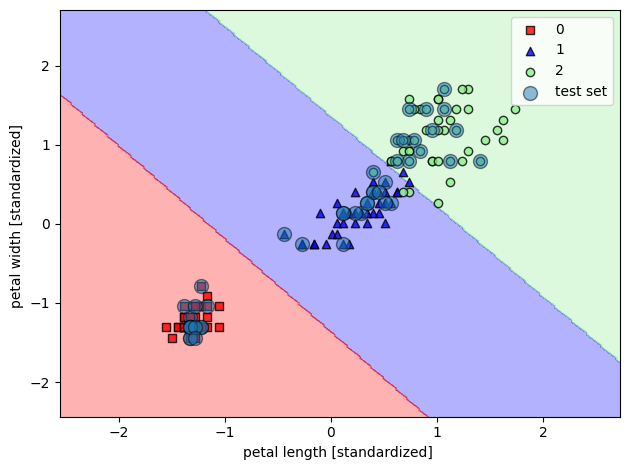

In [6]:
# SVM

from sklearn.svm import SVC

svm = SVC(kernel='linear',C=1.0, random_state=1)

svm.fit(X_train_std, y_train)

plot_decision_regions(X_combined_std, y_combined, classifier = svm,
                      test_idx = range(105,150))

plt.xlabel('petal length [standardized] ')
plt.ylabel('petal width [standardized] ')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

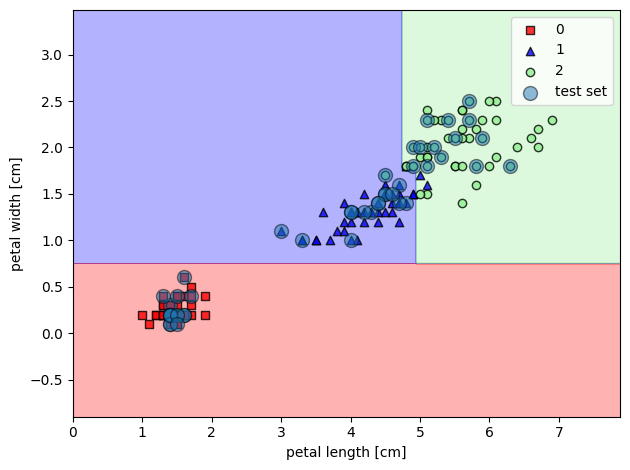

In [7]:
# Decision tree

from sklearn.tree import DecisionTreeClassifier

tree_model = DecisionTreeClassifier(criterion='gini',max_depth=4,
                                    random_state=1)
tree_model.fit(X_train,y_train)
X_combined = np.vstack((X_train,X_test))
y_combined = np.hstack((y_train, y_test))

plot_decision_regions (X_combined, y_combined, classifier = tree_model, test_idx=range(105,150))

plt.xlabel('petal length [cm]')
plt.ylabel('petal width [cm]')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

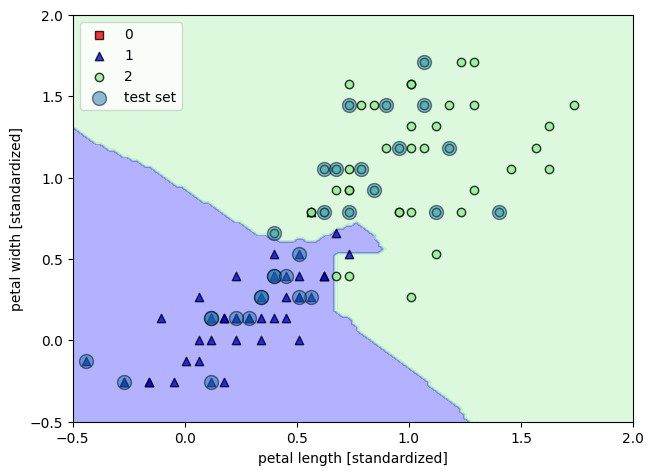

In [8]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3, p=2, metric='minkowski')

knn.fit(X_train_std, y_train)
plot_decision_regions(X_combined_std,y_combined,classifier=knn,test_idx=range(105,150))
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()

ax=plt.gca()
ax.set_xlim([-.5,2])
ax.set_ylim([-.5,2])
plt.show()